In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 433.3 kB/s eta 0:00:00a 0:00:01


In [4]:
students_df = pd.read_excel("data_students.xls", sheet_name="Training_Data")
students_df.head()

,STG,SCG,STR,LPR,PEG,Unnamed: 5,Unnamed: 6,Attribute Information:
0,0.08,0.08,0.10,0.24,0.90,NaN,NaN,STG (The degree of study time for goal object ...
1,0.06,0.06,0.05,0.25,0.33,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.10,0.10,0.15,0.65,0.30,NaN,NaN,STR (The degree of study time of user for rela...
3,0.08,0.08,0.08,0.98,0.24,NaN,NaN,LPR (The exam performance of user for related ...
4,0.09,0.15,0.40,0.10,0.66,NaN,NaN,PEG (The exam performance of user for goal obj...


In [5]:
students_df = students_df.loc[:, ["STG", "SCG", "STR", "LPR", "PEG"]]
students_df.describe()

,STG,SCG,STR,LPR,PEG
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.354020,0.356826,0.458794,0.432415,0.457495
std,0.211546,0.215064,0.245929,0.256962,0.266131
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.200000,0.200000,0.270000,0.250000,0.250000
50%,0.302500,0.300000,0.445000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


(Text(0.5, 0, 'STG'), Text(0, 0.5, 'PEG'))

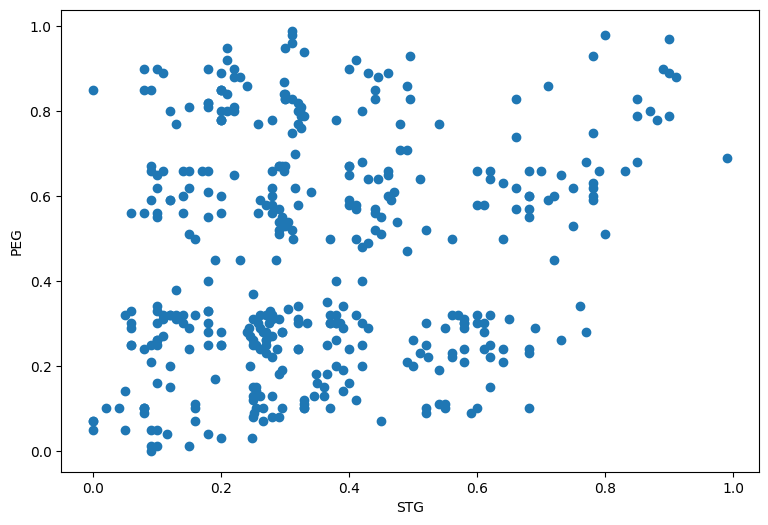

In [16]:
fig = plt.figure(figsize=(9,6))
X = students_df[['STG' , 'PEG']].values
plt.scatter(X[:,0], X[:,1])
plt.xlabel('STG') , plt.ylabel('PEG')

### KMeans Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [45]:
inertia = []
for cl_num in range(1 , 10):
    km = KMeans(n_clusters = cl_num, max_iter=100, n_init='auto', random_state= 100)
    km.fit(X)
    inertia.append(km.inertia_)

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

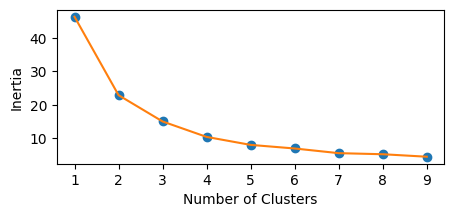

In [46]:
fig = plt.figure(figsize=(5, 2))

plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

In [29]:
k = 3
km_cluster = KMeans(n_clusters = k , n_init = 'auto',max_iter=200, random_state= 120)
km_cluster.fit(X)
labels = km_cluster.labels_
centroids = km_cluster.cluster_centers_

Text(0.5, 1.0, 'Find groups in students Data')

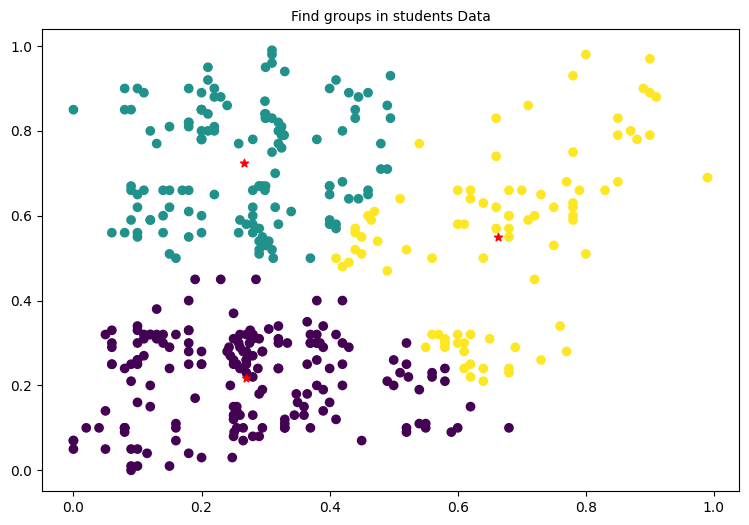

In [40]:
fig = plt.figure(figsize=(9, 6))

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0] ,centroids[:,1], color='red', marker="*")
plt.title("Find Unknown groups in students Data", fontsize=10)

In [43]:
davies_bouldin_score(X, labels)

0.8328288084785589